In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dataset = pd.read_csv('games.csv')

In [3]:
dataset.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [4]:
dataset.tail()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
81307,184441,boardgameexpansion,Micro Rome: Aegyptus,2015.0,1.0,1.0,0.0,30.0,0.0,10.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81308,184442,boardgame,Trivial Pursuit: Marvel Cinematic Universe Da...,2013.0,2.0,0.0,0.0,0.0,0.0,12.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81309,184443,boardgame,BEARanoia,2015.0,2.0,15.0,1.0,1.0,1.0,0.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81310,184449,boardgame,Freight,2015.0,2.0,4.0,60.0,30.0,60.0,8.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81311,184451,boardgame,Bingo Animal Kids,2010.0,1.0,6.0,10.0,10.0,10.0,2.0,0,0.0,0.0,0,0,0,0,0,0,0.0


In [5]:
dataset.isna().sum()

id                       0
type                     0
name                    41
yearpublished            3
minplayers               3
maxplayers               3
playingtime              3
minplaytime              3
maxplaytime              3
minage                   3
users_rated              0
average_rating           0
bayes_average_rating     0
total_owners             0
total_traders            0
total_wanters            0
total_wishers            0
total_comments           0
total_weights            0
average_weight           0
dtype: int64

In [6]:
dataset.dropna(inplace=True)

In [7]:
dataset.shape

(81268, 20)

(array([24374.,   606.,  1324.,  3303.,  6681., 12264., 15835., 11733.,
         3860.,  1288.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

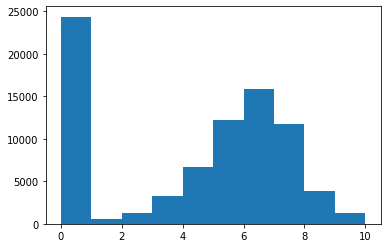

In [9]:
plt.hist(dataset['average_rating'])

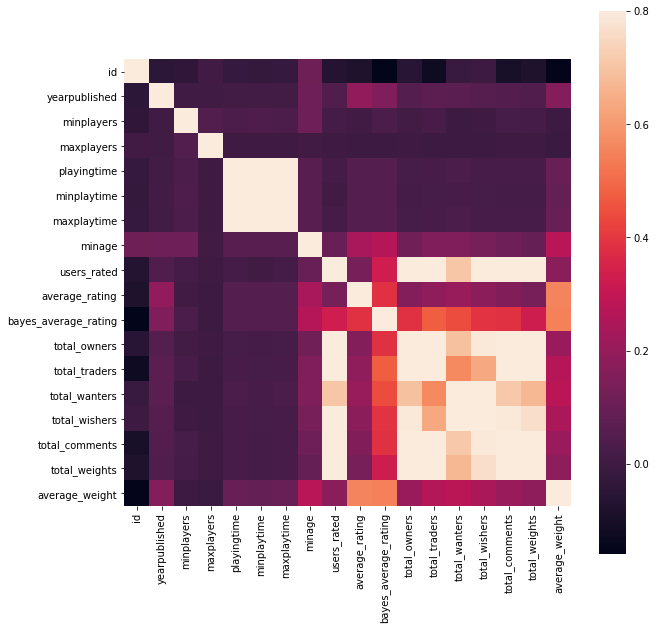

In [10]:
correlation = dataset.corr()
fig = plt.figure(figsize=(10,10))
sns.heatmap(correlation , vmax = 0.8 , square=True)
plt.show()

In [11]:
X = dataset.iloc[: , [4,5,6,7,8,9,10]].values
y = dataset.iloc[: , 11].values

In [12]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X ,y , test_size=0.2 , random_state=0)

In [13]:
x_train.shape

(65014, 7)

In [14]:
from math  import sqrt
sqrt(65014)

254.97843046030383

In [15]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 255 , random_state=0)
regressor.fit(x_train , y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=255, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [16]:
y_pred = regressor.predict(x_test)

In [17]:
from sklearn.metrics import r2_score
r2_score(y_test , y_pred)

0.8412423148648285

**Evaluating our model**

In [18]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor ,X=x_train ,y=y_train , cv=10)
accuracies.mean()
accuracies.std()

0.0033369048692157587

In [19]:
accuracies.mean()

0.8401970378886991

**Improving the model**

In [21]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'bootstrap':[True],
    'min_samples_leaf':[3,4,5],
    'min_samples_split':[6,8,10,12],
    'n_estimators':[251,261,271]
}

grid = GridSearchCV(estimator = regressor , param_grid = parameters , cv = 10 , n_jobs=-1)
grid = grid.fit(x_train , y_train)

best_accuracy = grid.best_score_
best_parameters = grid.best_params_

In [23]:
best_accuracy

0.853678062462776

In [24]:
best_parameters

{'bootstrap': True,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 271}

In [ ]:
#Thank you!!